In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV với định dạng thời gian cụ thể
df = pd.read_csv('data_full.csv', parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M'))

print(df)

                     time  temperature  humidity  rain(mm)  \
0     2016-01-01 00:00:00         15.1      80.0       0.0   
1     2016-01-01 01:00:00         14.9      82.0       0.0   
2     2016-01-01 02:00:00         14.9      81.0       0.0   
3     2016-01-01 03:00:00         15.0      76.0       0.0   
4     2016-01-01 04:00:00         14.7      78.0       0.0   
...                   ...          ...       ...       ...   
69722 2023-12-15 02:00:00         22.6      95.0       0.0   
69723 2023-12-15 03:00:00         22.9      94.0       0.0   
69724 2023-12-15 04:00:00         23.1      94.0       0.0   
69725 2023-12-15 05:00:00         23.0      94.0       0.0   
69726 2023-12-15 06:00:00         22.8      95.0       0.0   

       surface_pressure(hPa)  wind_speed_10m(km/h)  wind_gusts_10m(km/h)  
0                     1025.7                   3.3                   5.0  
1                     1025.0                   2.9                   4.7  
2                     1024.2  

# Lượng mưa toàn thời gian

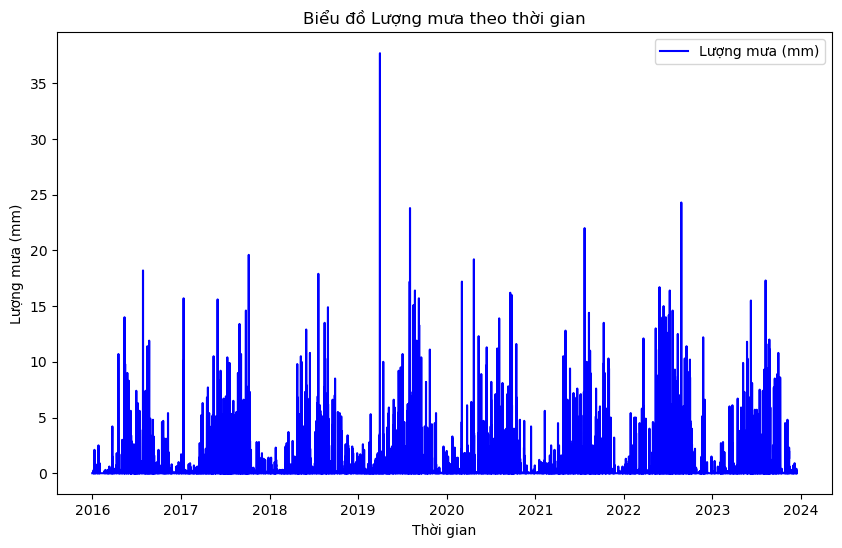

In [2]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['rain(mm)'], label='Lượng mưa (mm)', color='blue')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ Lượng mưa theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Lượng mưa (mm)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Tổng lượng mưa theo các năm 

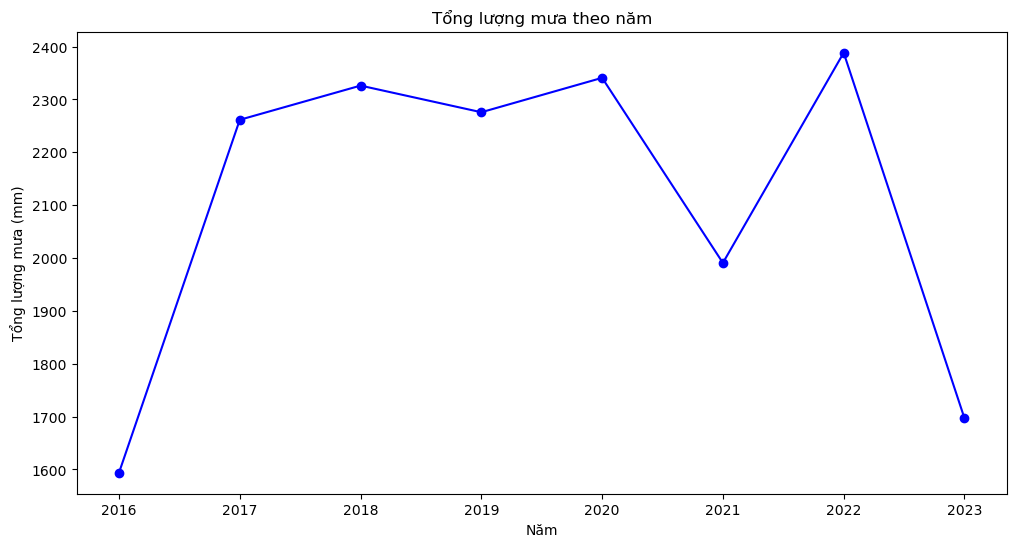

In [3]:
# Tính tổng lượng mưa theo năm
df['year'] = df['time'].dt.year
total_rain_by_year = df.groupby('year')['rain(mm)'].sum()

# Vẽ biểu đồ dòng
plt.figure(figsize=(12, 6))
plt.plot(total_rain_by_year.index, total_rain_by_year.values, marker='o', linestyle='-', color='blue')

# Đặt tiêu đề và nhãn trục
plt.title('Tổng lượng mưa theo năm')
plt.xlabel('Năm')
plt.ylabel('Tổng lượng mưa (mm)')

# Hiển thị biểu đồ
plt.show()

# Lượng mưa theo tháng 

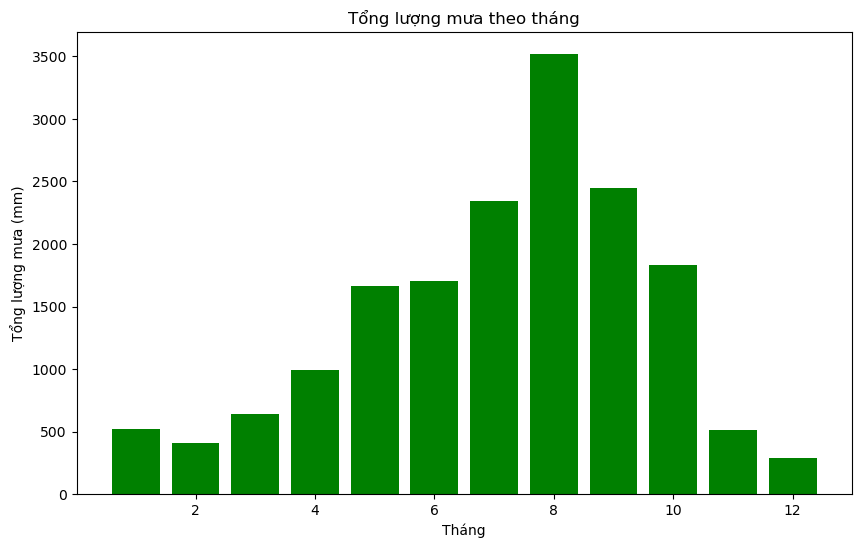

In [4]:
# Tính tổng lượng mưa theo tháng
df['month'] = df['time'].dt.month
total_rain_by_month = df.groupby('month')['rain(mm)'].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(total_rain_by_month.index, total_rain_by_month.values, color='green')

# Đặt tiêu đề và nhãn trục
plt.title('Tổng lượng mưa theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng lượng mưa (mm)')

# Hiển thị biểu đồ
plt.show()

# Tỷ lệ ngày có mưa 

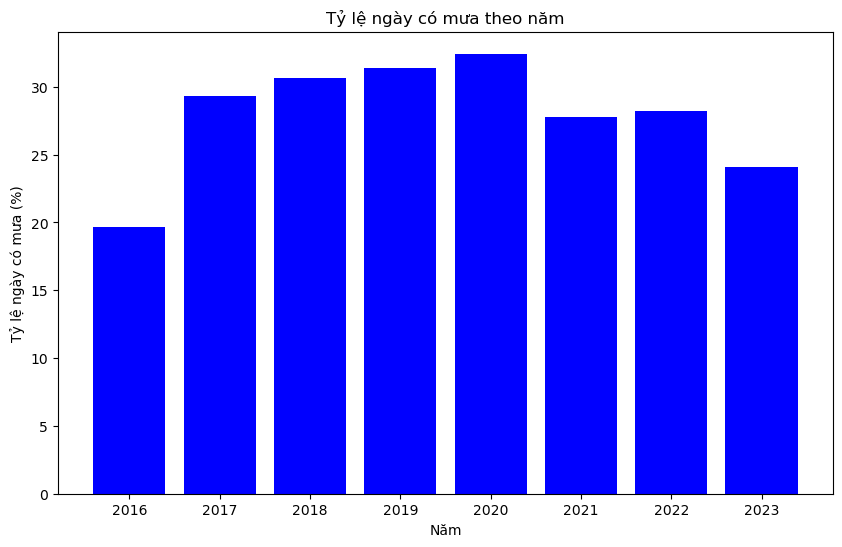

In [9]:
# Tính tỷ lệ ngày có mưa theo năm
df['year'] = df['time'].dt.year
rainy_days_by_year = df[df['rain(mm)'] > 0].groupby('year').size()
total_days_by_year = df.groupby('year').size()
rainy_days_ratio_by_year = (rainy_days_by_year / total_days_by_year) * 100  # Chuyển thành phần trăm

# Vẽ biểu đồ cột dạng đứng
plt.figure(figsize=(10, 6))
plt.bar(rainy_days_ratio_by_year.index, rainy_days_ratio_by_year, color='blue')

# Đặt tiêu đề và nhãn trục
plt.title('Tỷ lệ ngày có mưa theo năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ ngày có mưa (%)')

# Hiển thị biểu đồ
plt.show()

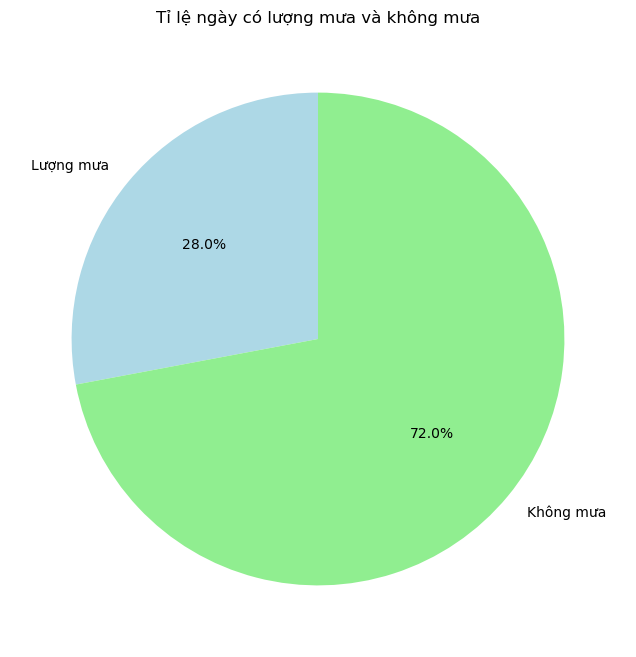

In [10]:
# Tính tỉ lệ lượng mưa và không mưa
rainy_days = len(df[df['rain(mm)'] > 0])
non_rainy_days = len(df) - rainy_days
labels = ['Lượng mưa', 'Không mưa']
sizes = [rainy_days, non_rainy_days]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])

# Đặt tiêu đề
plt.title('Tỉ lệ ngày có lượng mưa và không mưa')

# Hiển thị biểu đồ
plt.show()

# Sự phụ thuộc của lượng mưa và các trường khác 

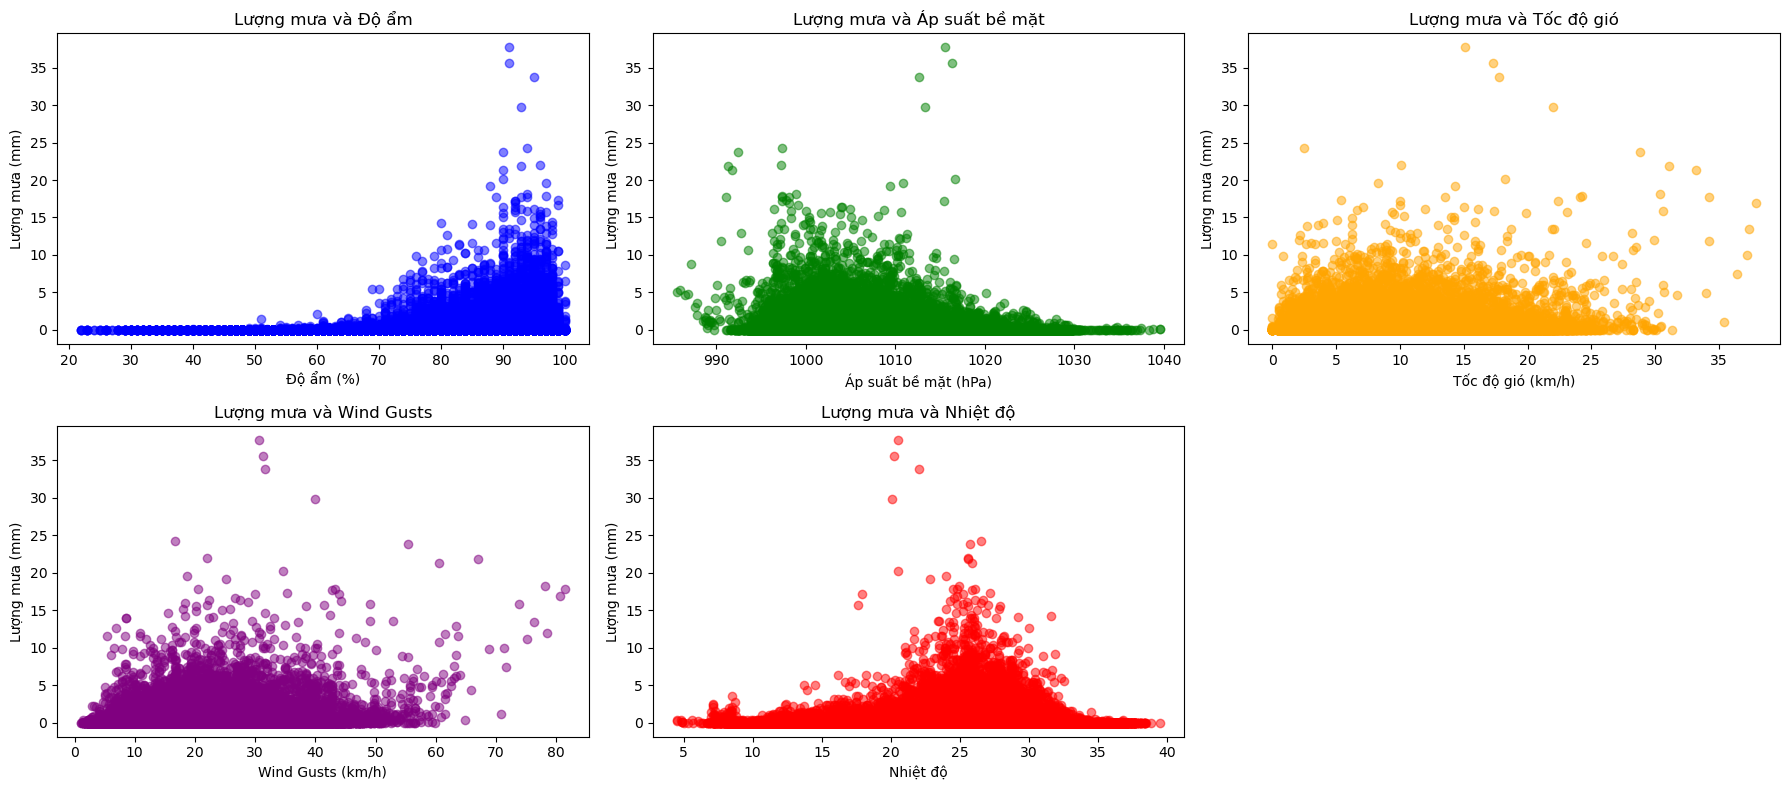

In [15]:
# Vẽ biểu đồ Scatter 2D
plt.figure(figsize=(18, 8))

# Lượng mưa và Độ ẩm
plt.subplot(231)
plt.scatter(df['humidity'], df['rain(mm)'], color='blue', alpha=0.5)
plt.title('Lượng mưa và Độ ẩm')
plt.xlabel('Độ ẩm (%)')
plt.ylabel('Lượng mưa (mm)')

# Lượng mưa và Áp suất bề mặt
plt.subplot(232)
plt.scatter(df['surface_pressure(hPa)'], df['rain(mm)'], color='green', alpha=0.5)
plt.title('Lượng mưa và Áp suất bề mặt')
plt.xlabel('Áp suất bề mặt (hPa)')
plt.ylabel('Lượng mưa (mm)')

# Lượng mưa và Tốc độ gió
plt.subplot(233)
plt.scatter(df['wind_speed_10m(km/h)'], df['rain(mm)'], color='orange', alpha=0.5)
plt.title('Lượng mưa và Tốc độ gió')
plt.xlabel('Tốc độ gió (km/h)')
plt.ylabel('Lượng mưa (mm)')

# Lượng mưa và Wind Gusts
plt.subplot(234)
plt.scatter(df['wind_gusts_10m(km/h)'], df['rain(mm)'], color='purple', alpha=0.5)
plt.title('Lượng mưa và Wind Gusts')
plt.xlabel('Wind Gusts (km/h)')
plt.ylabel('Lượng mưa (mm)')

# Lượng mưa và Nhiệt độ
plt.subplot(235)
plt.scatter(df['temperature'], df['rain(mm)'], color='red', alpha=0.5)
plt.title('Lượng mưa và Nhiệt độ')
plt.xlabel('Nhiệt độ')
plt.ylabel('Lượng mưa (mm)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Lượng mưa và độ ẩm 

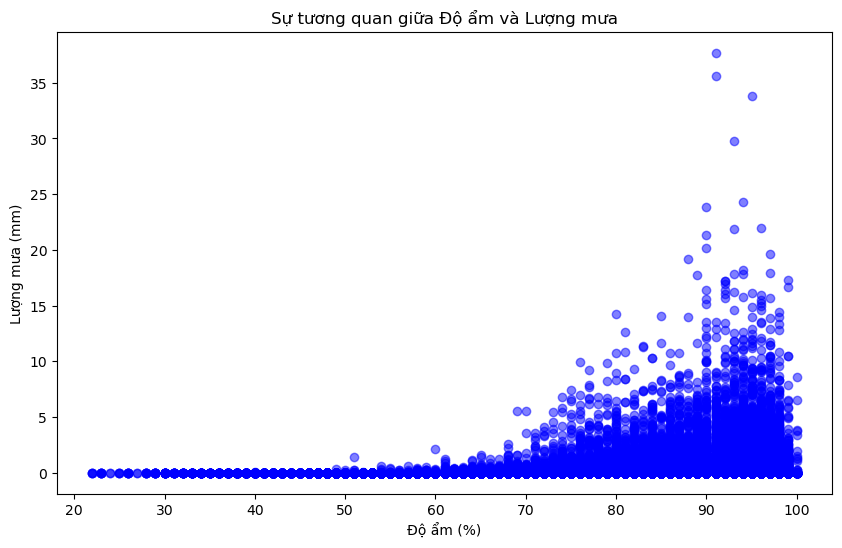

In [16]:
# Vẽ biểu đồ Scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['rain(mm)'], color='blue', alpha=0.5)

# Đặt tiêu đề và nhãn trục
plt.title('Sự tương quan giữa Độ ẩm và Lượng mưa')
plt.xlabel('Độ ẩm (%)')
plt.ylabel('Lượng mưa (mm)')

# Hiển thị biểu đồ
plt.show()